In [4]:
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:

print("Dataset shape:", df.shape)


df.info()


df.head()


df.describe()


df['Churn'].value_counts(normalize=True)

Dataset shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

,proportion
Churn,
No,0.73463
Yes,0.26537


In [7]:
# Check churn distribution
print(df['Churn'].value_counts())
print("\nChurn rate (%):")
print(df['Churn'].value_counts(normalize=True) * 100)

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn rate (%):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("Rows with missing TotalCharges after conversion:", df['TotalCharges'].isnull().sum())

df = df.dropna(subset=['TotalCharges'])

df['TotalCharges'].dtype

Rows with missing TotalCharges after conversion: 11


dtype('float64')

In [10]:
# Churn distribution
print(df['Churn'].value_counts())
print("\nChurn rate (%):")
print(df['Churn'].value_counts(normalize=True) * 100)

Churn
No     5163
Yes    1869
Name: count, dtype: int64

Churn rate (%):
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [12]:
# Drop customerID – not useful for prediction
df = df.drop('customerID', axis=1)

# Convert target variable Churn to binary (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Check all columns
print(df.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


In [13]:
# Get list of categorical columns (object type)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", cat_cols)

# One-hot encode them
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("New shape:", df_encoded.shape)

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
New shape: (7032, 31)


In [14]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (7032, 30)
Target shape: (7032,)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 5625
Test set size: 1407


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_lr = lr.predict(X_test_scaled)

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Random Forest doesn't need scaling

y_pred_rf = rf.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report (LR):\n", classification_report(y_test, y_pred_lr))

print("\n" + "="*50 + "\n")

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (RF):\n", classification_report(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.8038379530916845

Classification Report (LR):
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



Random Forest Accuracy: 0.7896233120113717

Classification Report (RF):
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



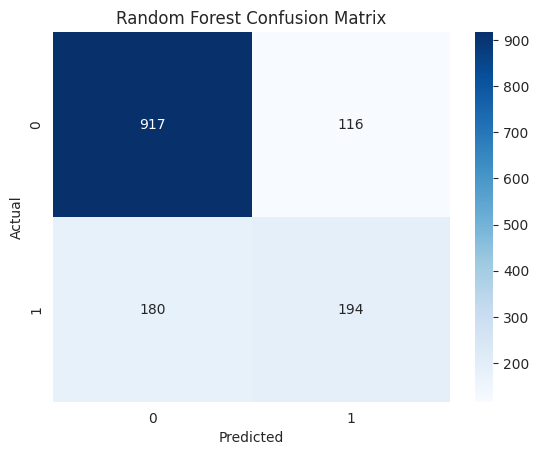

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

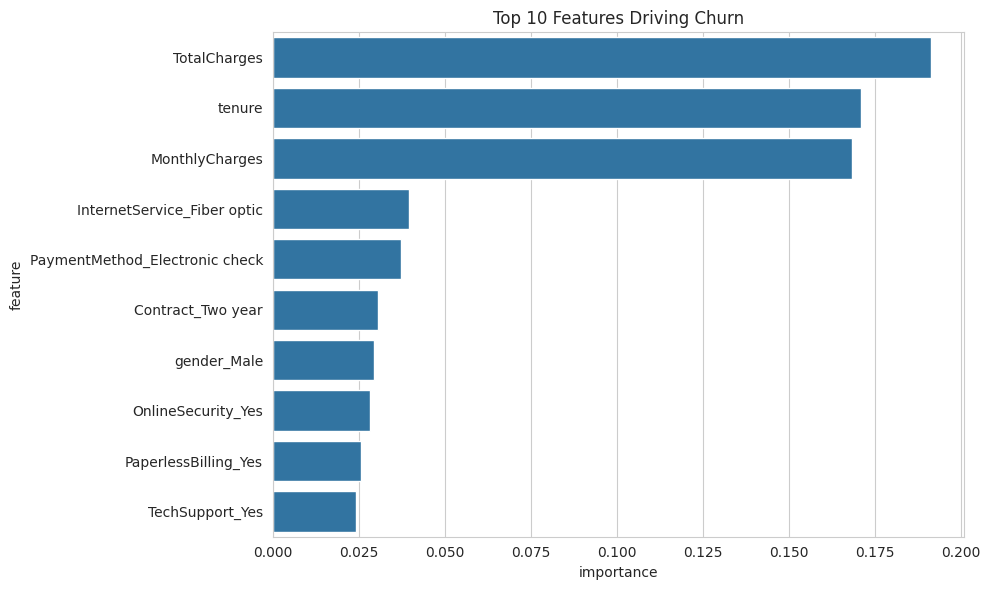

In [26]:
# Get feature importance from Random Forest
importance = rf.feature_importances_
features = X.columns

# Create DataFrame and sort
feat_imp = pd.DataFrame({'feature': features, 'importance': importance}).sort_values('importance', ascending=False)

# Plot top 10
plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp.head(10), x='importance', y='feature')
plt.title('Top 10 Features Driving Churn')
plt.tight_layout()
plt.show()

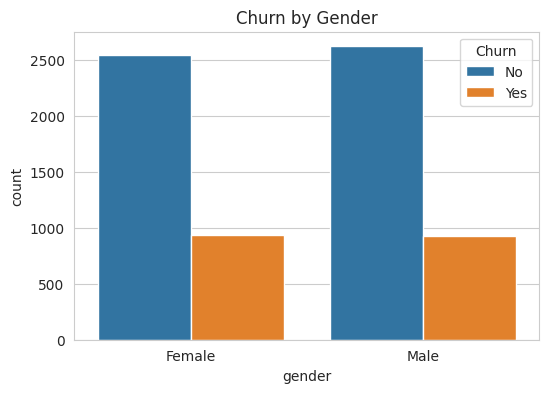

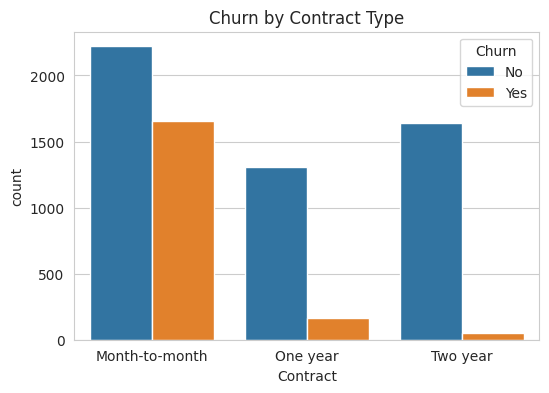

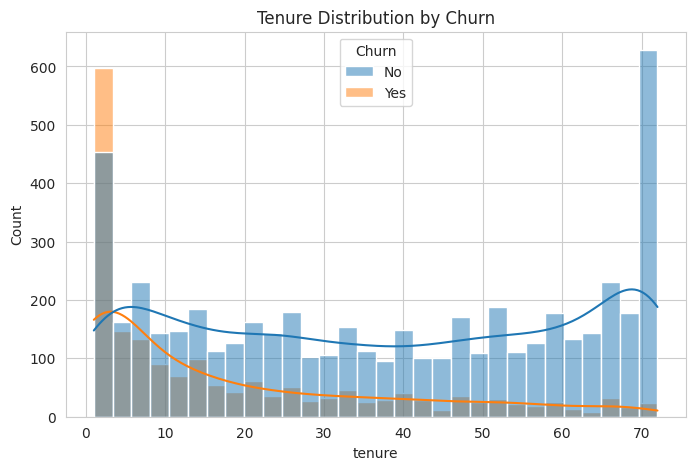

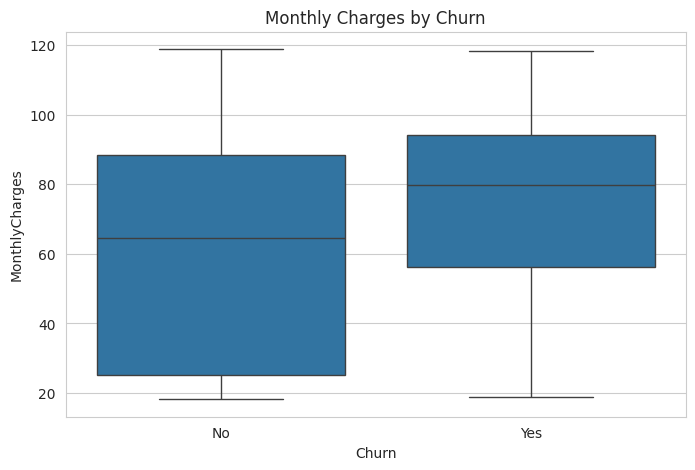

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')

# 1. Churn by gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Churn by Gender')
plt.show()

# 2. Churn by contract type
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.show()

# 3. Tenure distribution by churn
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30)
plt.title('Tenure Distribution by Churn')
plt.show()

# 4. Monthly charges vs churn
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn')
plt.show()

## What I Learned from This Churn Analysis

### 1. New customers leave the most
Looking at my chart, people who've been with the company less than 10 months are the ones who churn. Makes sense – they haven't built any loyalty yet.

**What the company can do**: Maybe send them a welcome email after 1 month, and a small discount after 6 months. Just something to keep them interested.

### 2. Price matters – a lot
Customers paying over $70/month are way more likely to leave. Probably they feel it's too expensive.

**What the company can do**: Bundle services (like internet + TV) so the monthly bill looks smaller. Or reach out to high-paying customers with a special offer before they decide to leave.

### 3. Month-to-month contracts = risky
People who don't sign a long contract leave much faster. No commitment means they can walk away anytime.

**What the company can do**: Offer a discount if they switch to a yearly plan. Maybe something like "sign a 1-year contract and get 1 month free."

### 4. Fiber optic users are unhappy
This surprised me – you'd think faster internet would make people stay, but they actually churn more. Maybe it's too expensive or the service isn't reliable.

**What the company can do**: Ask fiber customers what's wrong (a quick survey). Maybe fix technical issues faster for them.

### 5. Payment method shows who might leave
People paying with electronic check churn the most. Maybe they forget to pay or don't like the billing process.

**What the company can do**: Give a small $5 discount for setting up auto-pay. Make it easy for them.

## Quick Summary
If I had to pick 3 things to fix first:
1. Keep new customers happy in their first year
2. Make high monthly bills feel smaller with bundles
3. Get people on yearly contracts instead of month-to-month